In [547]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [548]:
DATA_DIR = "data"
SEAM_DIR = "seam"
DATA_PATH = os.path.join(DATA_DIR, SEAM_DIR)

In [549]:
data_files = [os.path.join(DATA_PATH,filename) for filename in os.listdir(DATA_PATH)]
df = pd.read_csv(data_files[0], encoding="cp949")
df.target.replace({"P":True, "F":False}, inplace=True)
# df.Production.replace({"Production":True, None:False}, inplace=True)


In [550]:
df.describe()

,Total No.,Daily No.,Lt,La,e,p1,p2,tmin,LOC. Hull
count,29301.000000,29251.000000,29301.000000,29301.000000,29301.000000,29301.000000,29301.000000,29301.000000,29301.000000
mean,4836.992253,8.311784,2.324301,2.210012,1.234743,0.392310,0.332196,0.646554,2439.832224
std,2652.743077,5.687276,0.175999,0.180533,0.102132,0.059995,0.051384,0.027909,19.289553
min,1.000000,1.000000,1.290000,1.020000,0.750000,0.130000,0.060000,0.070000,2408.000000
25%,2696.000000,4.000000,2.220000,2.090000,1.170000,0.350000,0.300000,0.630000,2423.000000
50%,4719.000000,7.000000,2.330000,2.220000,1.230000,0.390000,0.330000,0.640000,2441.000000
75%,6742.000000,12.000000,2.440000,2.330000,1.300000,0.430000,0.370000,0.670000,2454.000000
max,11272.000000,40.000000,2.920000,2.800000,2.440000,2.450000,0.580000,0.970000,2489.000000


In [551]:
category_columns = ["Machine No.", "Operator name", "TK", "LOC. Hull"]
output_columns = ["Lt","La","e","p1","p2","tmin"]
analysis_columns =[]

for col_name in category_columns:
    lbl = LabelEncoder()
    print(col_name)
    df[col_name.split(" ")[0].lower()+"_label"] = lbl.fit_transform(df[col_name])
    analysis_columns.append(col_name)

df["machine_operator_combi"] = df["machine_label"].map(str) + "-" + df["operator_label"].map(str)
analysis_columns.append("machine_operator_combi")
analysis_columns.append("date")

Machine No.
Operator name
TK
LOC. Hull


In [552]:
from sklearn.manifold.t_sne import TSNE

tsne= TSNE(n_components=2, perplexity=120)
tsne_ouput = tsne.fit_transform(df[output_columns])
df_tsne = pd.DataFrame(tsne_ouput, columns=["X","Y"])
df_tsne["target"] = df.target
sns.scatterplot(x="X", y="Y", hue="target", data=df_tsne.sample(frac=1))

KeyboardInterrupt: 

In [553]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names))[-10:])
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()



/home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sc82choi/minic

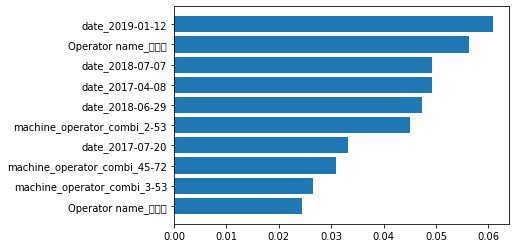

0.9954954954954955

In [554]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
clf = XGBClassifier(n_estimators=1000, max_depth=3, n_jobs=8, )
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 
columns = pd.get_dummies(df[analysis_columns]).columns
x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(df[analysis_columns]), df.target)
clf.fit(x_train, y_train)
f_importances(clf.feature_importances_, columns.tolist())
sum(clf.predict(x_test) == y_test) / len(y_test)

In [ ]:
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('dietox', 'geepack').data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

In [558]:
df

,Total No.,date,Daily No.,Grade,Machine No.,Operator name,Operator No.,Position,Joint,Lt,...,tmin,LOC. Hull,TK,Production,target,machine_label,operator_label,tk_label,loc._label,machine_operator_combi
0,1924,2015-10-09,1.0,MO2A,DW-IV-003,손기영,944399,F,SEAM,2.27,...,0.69,2408,2TK,NaN,True,2,63,2,0,2-63
1,1027,2015-10-09,1.0,MO2A,DW-IV-003,손기영,944399,F,SEAM,2.03,...,0.69,2408,2TK,Production,True,2,63,2,0,2-63
2,1028,2015-10-09,2.0,MO2A,DW-IV-006,이희갑,941245,F,SEAM,2.38,...,0.69,2408,2TK,Production,True,5,90,2,0,5-90
3,1926,2015-10-09,3.0,MO2A,DW-IV-006,이희갑,941245,F,SEAM,2.13,...,0.69,2408,2TK,NaN,True,5,90,2,0,5-90
4,1029,2015-10-09,3.0,MO2A,DW-SMST-005,김성배,933361,F,SEAM,1.70,...,0.69,2408,2TK,Production,True,25,16,2,0,25-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,11268,2019-05-31,6.0,MO2A,DW-IV-008,김상현,N004881,F,SEAM,2.14,...,0.61,2467,4TK,NaN,True,7,13,6,52,7-13
29297,11269,2019-05-31,7.0,MO2A,DW-IV-013,최기주,N004076,F,SEAM,2.26,...,0.61,2467,4TK,NaN,True,13,110,6,52,13-110
29298,11270,2019-05-31,8.0,MO2A,DW-IV-018,강정민,947366,F,SEAM,2.23,...,0.60,2467,4TK,NaN,True,18,5,6,52,18-5
29299,11271,2019-05-31,9.0,MO2A,DW-IV-008,김상현,N004881,F,SEAM,2.27,...,0.61,2467,2TK,NaN,True,7,13,2,52,7-13


In [565]:
import statsmodels.formula.api as smf

md = smf.mixedlm("target ~ C(machine_label, Sum)", df, groups=df["Operator name"])
mdf = md.fit()
print(mdf.summary())

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [ ]:
result_df = df.groupby("machine_operator_combi").agg({"target":"mean", "Grade":"count"}).sort_values("target")
result_df 

In [ ]:
target_list = result_df[result_df.Grade > 10].index

In [325]:
df_10_more = df[df.machine_operator_combi.isin(target_list)]

In [326]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [328]:
X = pd.get_dummies(df["Machine No."])
y = df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.254
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.44e-13
Time:                        18:45:23   Log-Likelihood:                 39232.
No. Observations:               29301   AIC:                        -7.836e+04
Df Residuals:                   29251   BIC:                        -7.795e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DW-IV-001       0.9954      0.002    569.077      

In [329]:
X = pd.get_dummies(df["Operator name"])
y = df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.321
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.97e-14
Time:                        18:45:24   Log-Likelihood:                 39291.
No. Observations:               29301   AIC:                        -7.834e+04
Df Residuals:                   29181   BIC:                        -7.735e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
감정민            1.0000      0.063     15.765      0.0

In [330]:
value_df = df["date"].value_counts().reset_index()
target_date = value_df[value_df["date"] > 5]["index"]
cond = df["date"].isin(target_date)
target_df = df[cond]

X = pd.get_dummies(target_df["date"])
y = target_df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.764
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           8.52e-47
Time:                        18:45:36   Log-Likelihood:                 40215.
No. Observations:               29213   AIC:                        -7.822e+04
Df Residuals:                   28110   BIC:                        -6.909e+04
Df Model:                        1102                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     1.0000      0.021     48.178      0.0

In [335]:
X = pd.get_dummies(df_10_more["machine_operator_combi"])
y = df_10_more["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.013
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.70e-33
Time:                        18:47:45   Log-Likelihood:                 35307.
No. Observations:               26341   AIC:                        -6.967e+04
Df Residuals:                   25868   BIC:                        -6.580e+04
Df Model:                         472                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0-102          1.0000      0.018     54.202      0.0

In [337]:
X = pd.get_dummies(df["TK"])
y = df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.811
Date:                Sun, 10 Nov 2019   Prob (F-statistic):             0.0532
Time:                        18:47:59   Log-Likelihood:                 39162.
No. Observations:               29301   AIC:                        -7.830e+04
Df Residuals:                   29290   BIC:                        -7.821e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1TK            0.9967      0.001   1217.895      0.0

In [341]:
X = pd.get_dummies(df["Daily No."])
y = df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                -167.415
Model:                            OLS   Adj. R-squared (uncentered):           -167.628
Method:                 Least Squares   F-statistic:                             -786.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):                        1.00
Time:                        18:49:41   Log-Likelihood:                          34005.
No. Observations:               29301   AIC:                                 -6.794e+04
Df Residuals:                   29264   BIC:                                 -6.763e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [354]:
X = pd.get_dummies(df["LOC. Hull"])
y = df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.316
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           3.44e-25
Time:                        18:53:23   Log-Likelihood:                 39275.
No. Observations:               29301   AIC:                        -7.843e+04
Df Residuals:                   29243   BIC:                        -7.795e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2408           0.9748      0.004    274.213      0.0

In [355]:
X = pd.get_dummies(df["Production"])
y = df["target"]
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           0.000973
Time:                        18:53:24   Log-Likelihood:                 39158.
No. Observations:               29301   AIC:                        -7.831e+04
Df Residuals:                   29299   BIC:                        -7.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
False          0.9947      0.001   1918.014      0.0

In [332]:
for y_label in output_columns:
    X = pd.get_dummies(df["Operator name"])
    y = df[y_label]
    res2 = sm.OLS(y, X).fit()
    print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     Lt   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     65.95
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:46:23   Log-Likelihood:                 12818.
No. Observations:               29301   AIC:                        -2.540e+04
Df Residuals:                   29181   BIC:                        -2.440e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
감정민            2.2300      0.157     14.244      0.0

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     16.58
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          4.70e-321
Time:                        18:46:23   Log-Likelihood:                 26233.
No. Observations:               29301   AIC:                        -5.223e+04
Df Residuals:                   29181   BIC:                        -5.123e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
감정민            1.1900      0.099     12.015      0.0

                            OLS Regression Results                            
Dep. Variable:                     p2   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.601
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          6.05e-163
Time:                        18:46:23   Log-Likelihood:                 45965.
No. Observations:               29301   AIC:                        -9.169e+04
Df Residuals:                   29181   BIC:                        -9.069e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
감정민            0.2800      0.051      5.543      0.0

In [333]:
for y_label in output_columns:
    X = pd.get_dummies(df["Machine No."])
    y = df[y_label]
    res2 = sm.OLS(y, X).fit()
    print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     Lt   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:46:39   Log-Likelihood:                 11778.
No. Observations:               29301   AIC:                        -2.346e+04
Df Residuals:                   29251   BIC:                        -2.304e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DW-IV-001       2.2948      0.004    514.015      

                            OLS Regression Results                            
Dep. Variable:                     p2   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     20.79
Date:                Sun, 10 Nov 2019   Prob (F-statistic):          5.18e-178
Time:                        18:46:40   Log-Likelihood:                 45904.
No. Observations:               29301   AIC:                        -9.171e+04
Df Residuals:                   29251   BIC:                        -9.129e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DW-IV-001       0.3275      0.001    235.065      

In [334]:
for y_label in output_columns:
    X = pd.get_dummies(df["date"])
    y = df[y_label]
    res2 = sm.OLS(y, X).fit()
    print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     Lt   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     12.77
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:46:54   Log-Likelihood:                 15398.
No. Observations:               29301   AIC:                        -2.853e+04
Df Residuals:                   28168   BIC:                        -1.914e+04
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     2.1344      0.049     43.883      0.0

                            OLS Regression Results                            
Dep. Variable:                     La   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     9.617
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:46:59   Log-Likelihood:                 13370.
No. Observations:               29301   AIC:                        -2.447e+04
Df Residuals:                   28168   BIC:                        -1.509e+04
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     1.8789      0.052     36.047      0.0

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     7.121
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:47:04   Log-Likelihood:                 28961.
No. Observations:               29301   AIC:                        -5.566e+04
Df Residuals:                   28168   BIC:                        -4.627e+04
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     1.3178      0.031     43.042      0.0

                            OLS Regression Results                            
Dep. Variable:                     p1   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.986
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:47:09   Log-Likelihood:                 43538.
No. Observations:               29301   AIC:                        -8.481e+04
Df Residuals:                   28168   BIC:                        -7.542e+04
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     0.4122      0.019     22.143      0.0

                            OLS Regression Results                            
Dep. Variable:                     p2   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     5.337
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:47:14   Log-Likelihood:                 48249.
No. Observations:               29301   AIC:                        -9.423e+04
Df Residuals:                   28168   BIC:                        -8.484e+04
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     0.3067      0.016     19.346      0.0

                            OLS Regression Results                            
Dep. Variable:                   tmin   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     22.81
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:47:20   Log-Likelihood:                 72817.
No. Observations:               29301   AIC:                        -1.434e+05
Df Residuals:                   28168   BIC:                        -1.340e+05
Df Model:                        1132                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2015-10-09     0.6900      0.007    100.677      0.0